In [1]:
#add matplotlib inline command
%matplotlib inline

# Dependencies and setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Files to Load
city_data_to_load ="Resources/city_data.csv"
ride_data_to_load ="Resources/ride_data.csv"

In [3]:
# read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [12]:
# read the ride data file and store in dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### 5.2.4 Explore the Data in pandas

Inspect the city Dataframe

In [4]:
city_data_df.count() # to get the number of rows that are not null we use the count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
city_data_df.isnull().sum() # another option to get the number of rows null are isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# confirm the datatypes of the columns 
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type 
city_data_df["type"].unique() 

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# to get the number of data points from the urban city 
sum(city_data_df["type"]=="Urban")

66

In [9]:
# to get the number of datapoints from the Suburban
sum(city_data_df["type"]=="Suburban")

36

In [10]:
# to get he number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [19]:
city_data_df.groupby("type").count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


### inspect ride data 

In [13]:
# get the columns and rows that are not null 
ride_data_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# another option to get number of null rows 
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# get the data type of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge the city and ride dataframe

In [18]:
pyber_data_df  = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [22]:
# create the urban city data frame
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [23]:
# create the suburban and rural city data frames
suburban_cities_df =  pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [28]:
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [27]:
# get hte number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [30]:
suburban_ride_count=suburban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [32]:
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

### 5.3.3. Get the Average Fare for Each City Type

In [35]:
# get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [38]:
# get the average fare for each city in the suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [40]:
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

### Get the Average Number of Drivers for Each Type

In [43]:
# Get the average of drivers for each city
urban_driver_count  = urban_cities_df.groupby("city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [46]:
# get the average number driver for suburban / rural
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
suburban_driver_count.head()


city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [47]:
rural_driver_count =  rural_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

### Create Bubble Chart

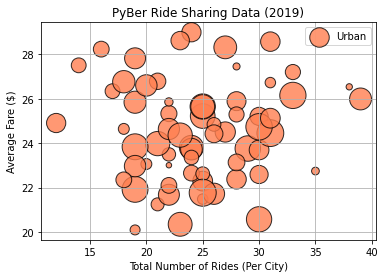

In [60]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count,
            color="coral",
            alpha=0.8,
            label="Urban",
            edgecolor="black",
            linewidths=1
           )
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

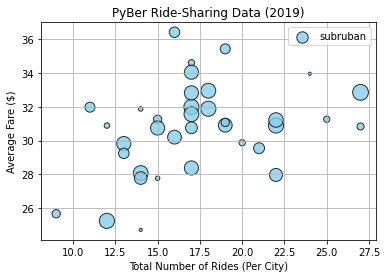

In [63]:
# Create the suburban cities Bubble Chart

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="subruban")
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

#legend
plt.legend()

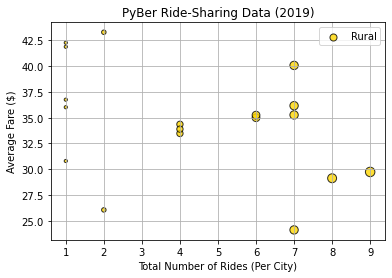

In [72]:
# create the rural cities bubble Chart
plt.scatter(rural_driver_count,
            rural_avg_fare,
           color ="gold",
           label="Rural",
           s =10*rural_driver_count,
           linewidths=1, alpha=0.8,
           edgecolors="black")
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()

### 5.3.6 Create Bubble Chart for All Cities types

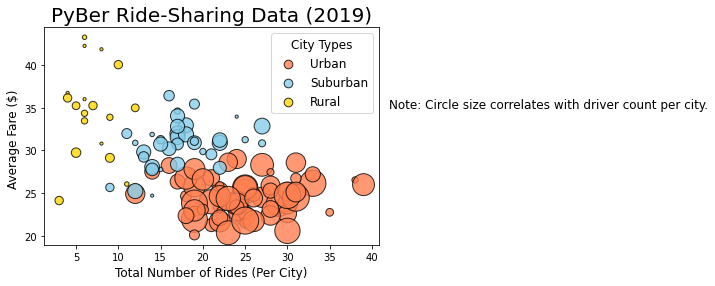

In [94]:
# Add the scatter charts for each type of city

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s = 10 * urban_driver_count,
           c= "coral",
           edgecolors="black",
           linewidths=1,
           alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare,
            s = 10* suburban_driver_count,
            c="skyblue", alpha=0.8, linewidths=1,
           edgecolors="black", label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare,
            s=10*rural_driver_count,
           c="gold", edgecolors="black", alpha=0.8,
           linewidths=1, label="Rural")

plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($) ", fontsize =12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.legend()
## Create a legend

lgnd = plt.legend(fontsize="12", mode="Expanded", 
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize =12)
#Save the figure 
plt.savefig("analysis/Fig1.png")

### 5.4.1 Summary Stats

In [95]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [96]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [97]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [100]:
# calculate the mean , median and mode for each city type
round(urban_ride_count.mean(),2) , round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [101]:
# calculate the median for each city  type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [107]:
# calculate the mode for each city type
round(urban_ride_count.mode(),2),  round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [108]:
# dependencies 
import numpy as np
import scipy.stats as sts

In [120]:
mean_urban_ride_count  = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}")

median_urban_ride_count  = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


mean_suburban_ride_count  = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}")

median_suburban_ride_count  = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count:.2f}")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}")

mean_rural_ride_count  = np.mean(rural_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_rural_ride_count:.2f}")


median_rural_ride_count  = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}")

The mean for the ride counts for urban trips is 24.62
The median for the ride counts for urban trips is 24.00
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mean for the ride counts for suburban trips is 17.36
The median for the ride counts for urban trips is 17.00
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7]))
The mean for the ride counts for suburban trips is 6.94
The median for the ride counts for rural trips is 6.00
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [122]:
### 5.4.2 Summary Stats for the fare by City

# Get the fares for the urban cities
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [133]:
# Calculate the measure of central tendency

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is $ {mean_urban_fares:.2f}")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is $ {median_urban_fares:.2f}")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is $ {mode_urban_fares}")



The mean fare price for urban trips is $ 24.53
The median fare price for urban trips is $ 24.64
The mode fare price for urban trips is $ ModeResult(mode=array([22.86]), count=array([5]))


In [128]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [134]:
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is $ {mean_suburban_fares:.2f}")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is $ {median_suburban_fares:.2f}")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is $ {mode_suburban_fares}")

The mean fare price for suburban trips is $ 30.97
The median fare price for suburban trips is $ 30.75
The mode fare price for suburban trips is $ ModeResult(mode=array([17.99]), count=array([3]))


In [131]:
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [135]:
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for suburban trips is $ {mean_rural_fares:.2f}")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for suburban trips is $ {median_rural_fares:.2f}")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for suburban trips is $ {mode_rural_fares}")

The mean fare price for suburban trips is $ 34.62
The median fare price for suburban trips is $ 37.05
The mode fare price for suburban trips is $ ModeResult(mode=array([37.05]), count=array([2]))


In [137]:
## 5.4.3 Driver Summary Stats

#Get the driver count data from the urban cities

urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [139]:
mean_urban_driver = np.mean(urban_drivers)
print(f"The mean drivers for urban city is {mean_urban_driver:2f}")

median_urban_driver = np.median(urban_drivers)
print(f"The median drivers  for urban city is {median_urban_driver:.2f}")

mode_urban_driver = sts.mode(urban_drivers)
print(f"The mode driver for urban city is {mode_urban_driver}")

The mean drivers for urban city is 36.678154
The median drivers  for urban city is 37.00
The mode driver for urban city is ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [141]:

#Get the driver count data from the suburban cities

suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [142]:
mean_suburban_driver = np.mean(suburban_drivers)
print(f"The mean drivers for urban city is {mean_suburban_driver:2f}")

median_suburban_driver = np.median(urban_drivers)
print(f"The median drivers  for urban city is {median_suburban_driver:.2f}")

mode_suburban_driver = sts.mode(urban_drivers)
print(f"The mode driver for urban city is {mode_suburban_driver}")

The mean drivers for urban city is 13.712000
The median drivers  for urban city is 37.00
The mode driver for urban city is ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [143]:

#Get the driver count data from the rural cities

rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [144]:
mean_rural_driver = np.mean(rural_drivers)
print(f"The mean drivers for urban city is {mean_rural_driver:2f}")

median_rural_driver = np.median(rural_drivers)
print(f"The median drivers  for urban city is {median_rural_driver:.2f}")

mode_rural_driver = sts.mode(rural_drivers)
print(f"The mode driver for urban city is {mode_rural_driver}")

The mean drivers for urban city is 4.296000
The median drivers  for urban city is 4.00
The mode driver for urban city is ModeResult(mode=array([1], dtype=int64), count=array([32]))


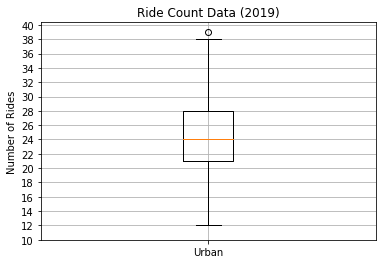

In [150]:
## 5.4.4 Box Whisker plots

#create a box-and-whisker plot for the urban cities ride count

x_labels = ["Urban"]
fig,ax = plt.subplots()

ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

In [151]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

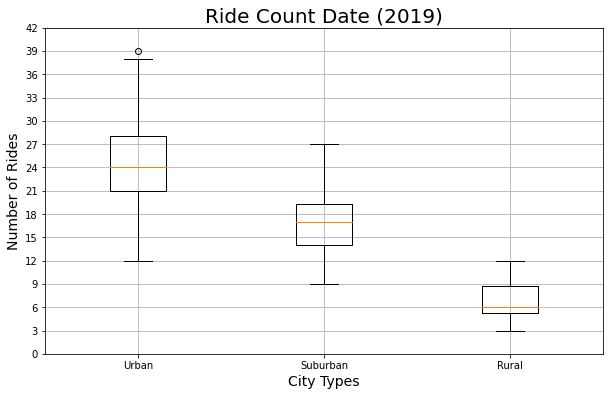

In [161]:
# add all ride count box-and-whisker plots to the same graph

x_label=["Urban" , "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax =plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Date (2019)', fontsize =20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(ride_count_data,labels=x_label)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()

#Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()


In [165]:
# Get the city that matches 39

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


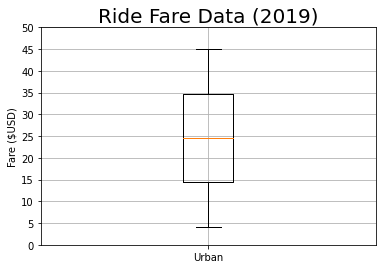

Summary


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [174]:
#box whisker plot for urban ride fare data

x_labels=["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)",fontsize=20)
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()

print("Summary")
urban_fares.describe()

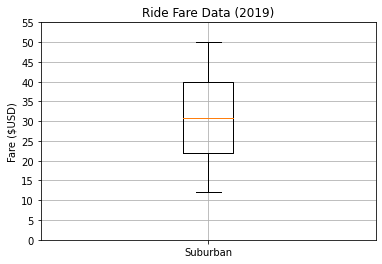

Summary


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [180]:
# create box_and_whisker plots for the suburban_fares and the rural_fares with summary statistics
x_labels=["Suburban"]
fig,ax = plt.subplots()
ax.boxplot(suburban_fares,labels=x_labels)

ax.grid()
ax.set_yticks(np.arange(0,56,step=5))
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
plt.show()

#summary
print("Summary")
suburban_fares.describe()

summary


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

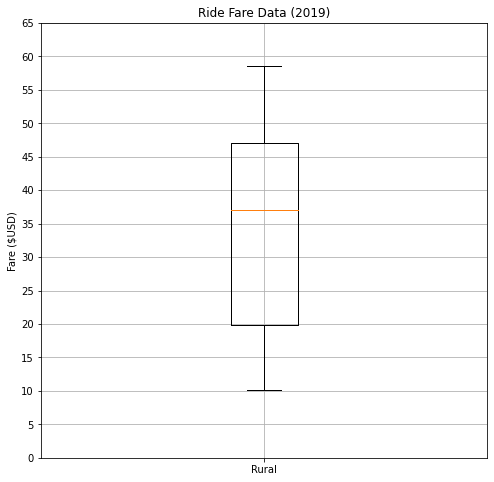

In [186]:
# get the box_whisker plots for rural
x_labels=["Rural"]
fig,ax =plt.subplots(figsize=(8,8))
ax.boxplot(rural_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,66,step=5))
ax.grid()

print("summary")
rural_fares.describe()

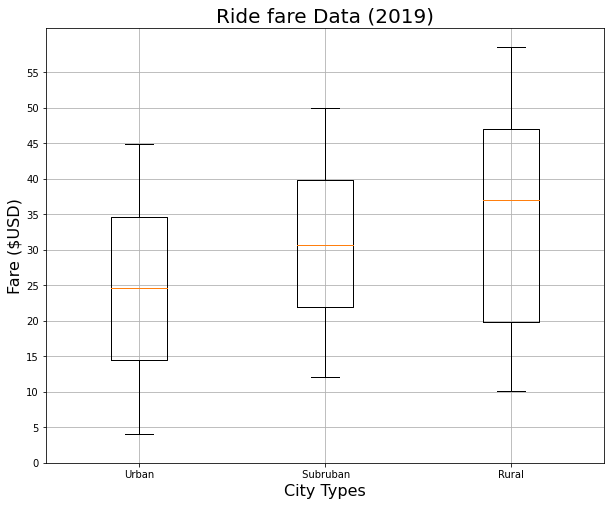

In [226]:
# adding all the fares into on plot

x_label = ["Urban"," Subruban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10,8))

ax.boxplot(fare_data, labels=x_label)
ax.set_title("Ride fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=16)
ax.set_xlabel("City Types", fontsize=16)
ax.set_yticks(np.arange(0,60,step=5))
ax.grid()


# Save
plt.savefig("analysis/Fig3.png")
plt.show()

Text(0.5, 0, 'City Type')

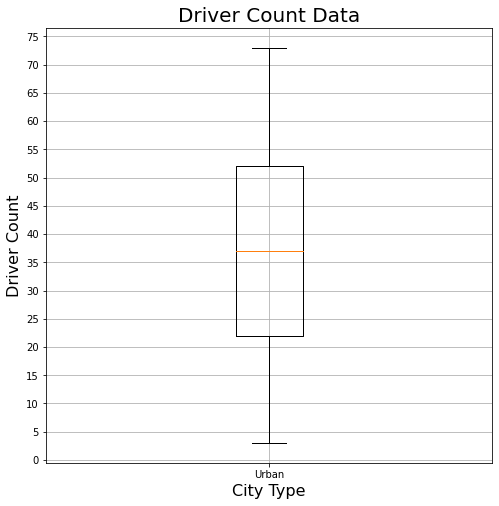

In [227]:
# create the box_and-whisker plot for the urban driver count data

x_labels =["Urban"]
fig, ax = plt.subplots(figsize=(8,8))
ax.boxplot(urban_drivers, labels=x_labels)
ax.grid()
ax.set_title("Driver Count Data", fontsize=20)
ax.set_ylabel("Driver Count", fontsize =16)
ax.set_yticks(np.arange(0,76,step=5))
ax.set_xlabel("City Type", fontsize = 16)


Text(0.5, 1.0, 'Driver Count 2019')

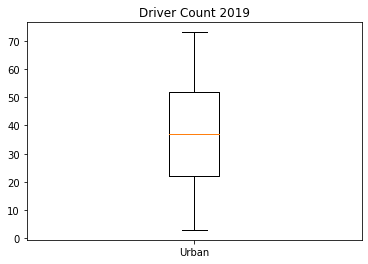

In [228]:
# plt.subplot()
plt.boxplot(urban_drivers, labels=x_labels)
plt.title("Driver Count 2019")

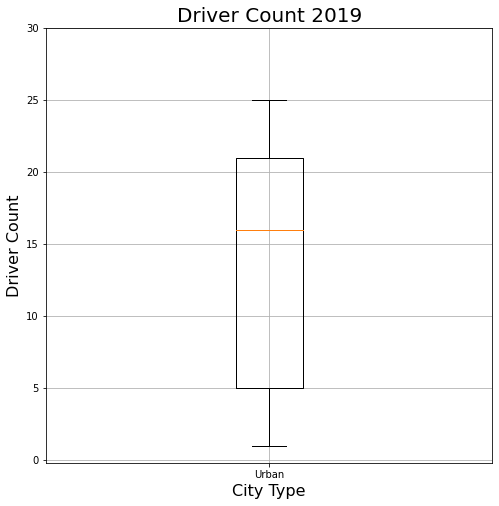

In [229]:
# suburban 
x_label = "Suburban"
fig,ax = plt.subplots(figsize=(8,8))
ax.boxplot(suburban_drivers, labels=x_labels)
ax.grid()
ax.set_title("Driver Count 2019",fontsize=20)
ax.set_ylabel("Driver Count", fontsize=16)
ax.set_xlabel("City Type", fontsize=16)
ax.set_yticks(np.arange(0,31,step=5.0))

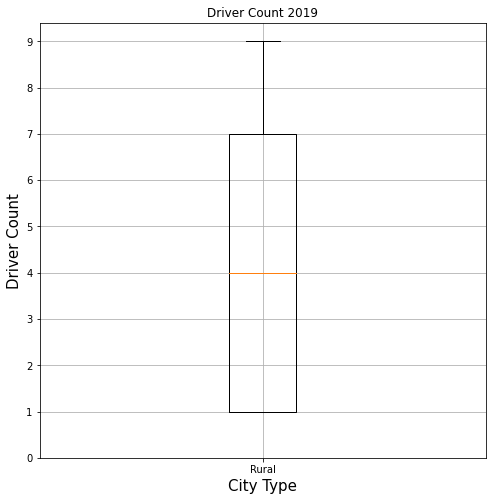

In [230]:
# rural

x_labels=["Rural"]
fig, ax= plt.subplots(figsize=(8,8))

ax.boxplot(rural_drivers, labels=x_labels)
ax.set_title("Driver Count 2019")
ax.set_ylabel('Driver Count', fontsize=15)
ax.set_xlabel('City Type', fontsize=15)
ax.grid()
ax.set_yticks(np.arange(0,10,step=1))


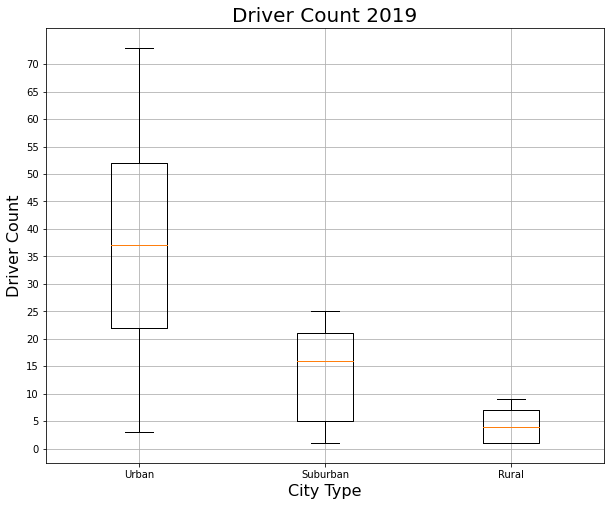

In [232]:
# get all the urban, subruban, rural box-whisker plots 

x_labels= ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(driver_count_data, labels=x_labels)
ax.grid()
ax.set_title("Driver Count 2019", fontsize=20)
ax.set_ylabel("Driver Count", fontsize=16)
ax.set_xlabel("City Type", fontsize=16)
ax.set_yticks(np.arange(0,71,step=5))

#save
plt.savefig("analysis/Fig4.png")
